<a href="https://colab.research.google.com/github/MrudhuhasM/Regression/blob/master/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='green'>Multiple Linear regression</font>

**n this note book i am going through multiple linear regression.It is same as simple linear regression but with many independent varibles**

$\hat{y} = b_{0}+b_{1}x_{1}+b_{2}x_{2}+b_{3}x_{3}+.......+b_{n}x_{n}$



---




*   b0  is constant (y-intercept)
*   b1  is co-efficient (slope)

**In this notebook i am  going to work on a startup dataset where i am going to predict potential profit based on their spend**



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style({'x_tick.bottom':False,
             'y_tick.left':False,
             'axes.spines.top':False,
             'axes.spines.left':False,
             'axes.spines.right':False,
             'axes.spines.bottom':False,
             'axes.spines.top':False})

In [67]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

**Let's look at descriptive statastics**

In [68]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000




*   Looks like Profit and R&d spend are right skewed
*   Administration and Marketing spend are left skewed



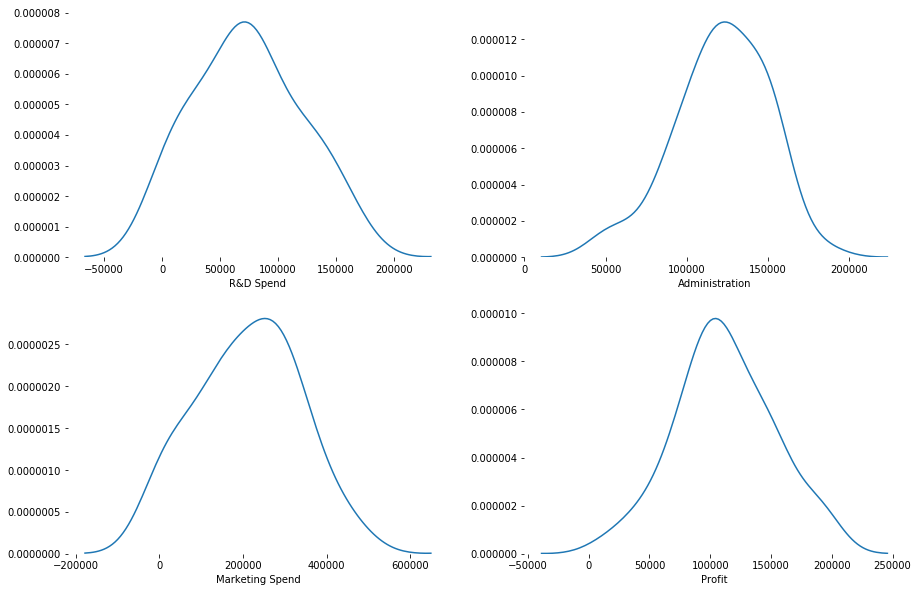

In [69]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.distplot(df['R&D Spend'],hist=False,ax=axes[0,0])
sns.distplot(df['Administration'],hist=False,ax=axes[0,1])
sns.distplot(df['Marketing Spend'],hist=False,ax=axes[1,0])
sns.distplot(df['Profit'],hist=False,ax=axes[1,1])

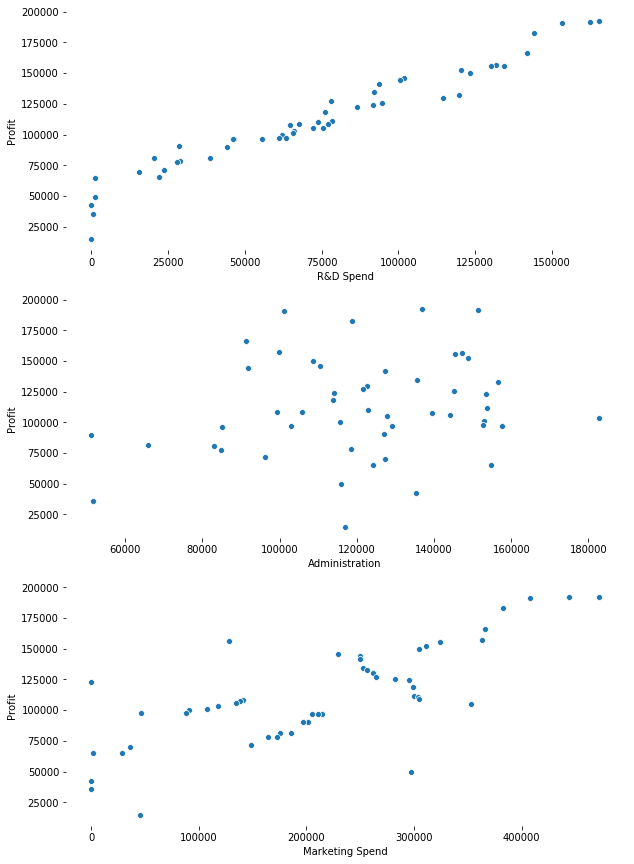

In [70]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(10,15))
sns.scatterplot(df['R&D Spend'],df['Profit'],ax=ax1)
sns.scatterplot(df['Administration'],df['Profit'],ax=ax2)
sns.scatterplot(df['Marketing Spend'],df['Profit'],ax=ax3)

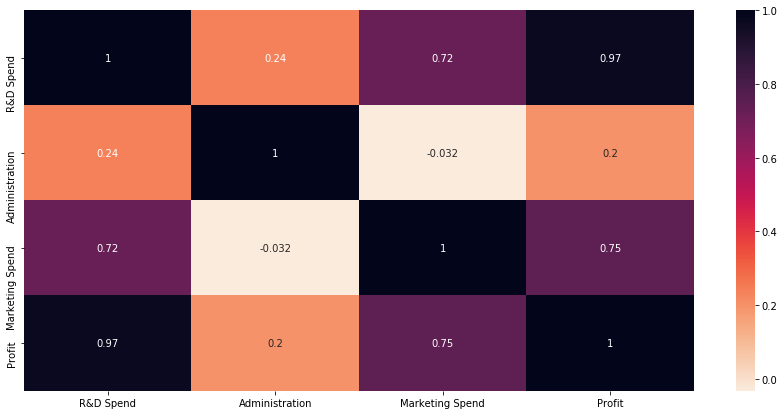

In [71]:
fig,ax1 = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),cmap=sns.cm.rocket_r,annot=True,ax=ax1)

In [72]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [73]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [74]:
cit = pd.get_dummies(df['State'],prefix='state',drop_first=True)
df = pd.concat([df,cit],axis=1)
df.drop(['State'],axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [75]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'state_Florida', 'state_New York'],
      dtype='object')

In [0]:
X = df.loc[:,['R&D Spend', 'Marketing Spend']].values
y = df['Profit'].values

In [78]:
X_ols = df.loc[:,['R&D Spend', 'Administration', 'Marketing Spend','state_Florida']].values
X_ols = sm.add_constant(X_ols)
results = sm.OLS(y,X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           8.49e-29
Time:                        02:47:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
X_ols = df.loc[:,['R&D Spend', 'Administration', 'Marketing Spend','state_Florida', 'state_New York']].values
X_ols = sm.add_constant(X)
results = sm.OLS(y,X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           2.16e-31
Time:                        02:47:35   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X_ols = df.loc[:,['R&D Spend', 'Administration', 'Marketing Spend']].values
X_ols = sm.add_constant(X_ols)
results = sm.OLS(y,X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           4.53e-30
Time:                        02:47:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X_ols = df.loc[:,['R&D Spend', 'Marketing Spend']].values
X_ols = sm.add_constant(X_ols)
results = sm.OLS(y,X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           2.16e-31
Time:                        02:47:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X = df.loc[:,['R&D Spend','Marketing Spend']].values
y = df['Profit'].values

In [82]:
X_ols = df.loc[:,['R&D Spend']].values
X_ols = sm.add_constant(X_ols)
results = sm.OLS(y,X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.50e-32
Time:                        02:47:36   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_reg.predict(X_test)

In [86]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'Rmse : {rmse}')

Rmse : 11766.768856513992
